#### The Single-Photon interferometer experiment : 

![SPI](https://perg.phys.ksu.edu/vqmorig/tutorials/online/wave_part/mach_zeh.gif)

***Fig 01 : Demonstration of a Single-Photon interferometer experiment***

*In the figure above, the incident photon is in horizontal direction.

## 1. Quantum Circuit code and output

#### i) Imports :

In [1]:
# Importing the QuantumCircuit class from Qiskit
# The QuantumCircuit class is used to create quantum circuits
from qiskit import QuantumCircuit

# Importing the numpy library
# Numpy is used for working with arrays and perform numerical operations
import numpy as np  

#### ii) Quantum circuit creation :

In [2]:
# My Circuit will use 1 qubit and 1 classical bit
# So parameterizing the value to use it in all places
n = 1

# I am creating a new object of the QuantumCircuit class 
# I am assigning this object to the variable named 'circuit' 
# The QuantumCircuit constructor takes 2 arguments: (Qubits, Classical bits)
# In my circuit, parameter n = 1, so 1 qubit and 1 classical bit is there
circuit = QuantumCircuit(n, n)

#### iii) Adding different components to my circuit :

In [3]:
# 1st Beam splitter:
# I am applying a rotation gate Rx around the x-axis by -π/2 rad to qubit 0.
# The rx method takes 2 arguments (angle of rotation, qubit index)
# The angle of rotation is -90° = -π/2 rad. Numpy computes this value.
# The rx gate is applied on the first index qubit 0
circuit.rx(-np.pi/2, 0)

# Mirror : 
# I am applying an X gate on the first index qubit 0.
# This X gate is equivalent to NOT gate which reverses the qubit state.
circuit.x(0)

# 2nd Beam splitter : 
# I am applying another rotation gate Rx 
# around the x-axis by -π/2 rad to qubit 0.
circuit.rx(-np.pi/2, 0)

#### iv) Measurement and circuit diagram :

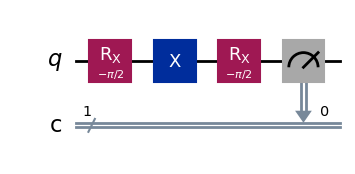

In [4]:
# The measure method is used to measure qubit 
# and store the result in classical bit.
# It takes 2 arguments (qubits, classical bits)
# I am measuring the single qubit index 0
# I am storing the result in single classical bit 0
circuit.measure([0], [0])

# The draw method is used to visualize the quantum circuit.
# I am drawing the circuit using the 'mpl' output and 'iqp' style
# mpl is used to render the quantum circuit using Matplotlib library.
# iqp is used for styling the circuit diagram. 
circuit.draw(output='mpl', style='iqp')

***Fig 02 : Quantum Circuit for the Single Photon Interferometer***

The above circuit diagram comprises of following notations and components :

**Circuit Notations :**

- **q** is the quantum bit which is represented by the solid horizontal line.
- **c** is the classical bit after measurement which is represented by the double lines.
- **1/** above the double lines represents the no. of classical data bits.

**Circuit Components :**

- **Rx** in red box represents the 1st Beam-Splitter. It is used to apply rotation around the x-axis by -π/2 rad.
- **X** in blue box represents the Mirror. It is used to reflect the photon's path.
- **Rx** in red box represents the 2nd Beam-Splitter. It is used to apply rotation around the x-axis by -π/2 rad.
- **Meter** in gray box represents the Measurement operation.

## 2. Simulation code and output

#### i) Imports :

In [5]:
# The qiskit_aer library provides backend quantum simulators 
# I am importing the Aer module which contains various type of simulators.
from qiskit_aer import Aer

# I am importing the transpile function from the qiskit library
# Transpile function is required to ensure that my circuit 
# is able to run on the simulator.
from qiskit import transpile

# Importing the plot_histogram function from qiskit 
# It used to visualize the simulation result.
from qiskit.visualization import plot_histogram 

#### ii) Getting the Simulator and running it

In [6]:
# I am creating a new backend object of Aer
# I am assigning this object to the variable named 'simulator' 
# I am using the "qasm_simulator" backend from Aer. 
# The qasm simulator runs the circuit and its result is classical bits.
simulator = Aer.get_backend("qasm_simulator")

# Transpile transforms the circuit to something appropriate for the machine.
# I am transpiling my circuit for the backend qasm simulator
# I am storing my transpiled circuit in variable named'sim_circuit'  
sim_circuit = transpile(circuit, backend = simulator)

# The run method in the simulator executes the transpiled circuit
# run method returns a job object which I am storing in variable named 'job'.
job = simulator.run(sim_circuit)

#### iii) Fetching the result and plotting histogram :

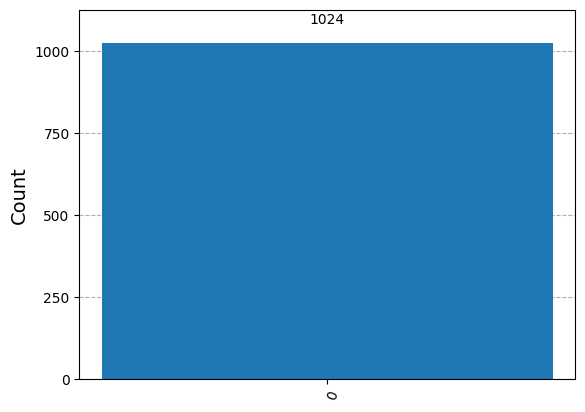

In [7]:
# I am fetching the results of the simulation job execution.
# I am storing this result in variable named 'result'.
# This result contains the counts of each measurement outcome.
result = job.result()

# I am generating and displaying a histogram of the simulation outcomes.
# result.get_counts() method is used to find the count of different outcomes.
# By default, the no. of trials is 1024.
plot_histogram(result.get_counts())

***Fig 03 : Measured state Vs Counts***

The histogram represents the probability of measuring the output state when my quantum circuit runs on the simulator.

In the above histogram :
- The **x-axis** represents the measured state.
- The **y-axis** represents the number of times each state was measured. By default, it is 1024 times.

Here, there is 0 on x-axis, which means that the measurement found the qubit in |0⟩ state. The qubit remained in the |0> state after 1024 trials. This is in accordance with our experimental setup.